# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset And Basic structure of Dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')
# print(df)
print("shape of Netflix Dataset is:\n",df.shape)
print("Columns name of Netflix Dataset is:\n",df.columns)
print("Data types of the data is:\n",df.dtypes)

shape of Netflix Dataset is:
 (8807, 12)
Columns name of Netflix Dataset is:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Data types of the data is:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [3]:
print(df.head(),'\n')
print(df.tail())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Understanding Summary Stats

In [4]:
print(f"Descriptive view of Dataset:\n{df.describe()}")

Descriptive view of Dataset:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [5]:
print("Displaying information of the dataset")
df.info()

Displaying information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
print("Unique values in Dataset are:","\n",df.nunique())
print("Number of Movies and TV Shows are:\n",df['type'].value_counts())
print("Top countries content wise:\n",df['country'].value_counts().head(10))

Unique values in Dataset are: 
 show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64
Number of Movies and TV Shows are:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Top countries content wise:
 country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


# Check for missing values

In [7]:
print("Count of each missing value:\n",df.isna().sum())
print("Percentage of missing values:\n",df.isna().mean()*100)

Count of each missing value:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
Percentage of missing values:
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


# Handling Missing Values

In [8]:
#for Director
df['director'] = df['director'].fillna('Unknown')
#for cast
df['cast'] = df['cast'].fillna('Unknown')
#for Country
df['country'] = df['country'].fillna('Unknown')
#rating
df['rating'] = df['rating'].fillna('Unknown')
#Duration
df['duration'] = df['duration'].fillna('Unknown')
#date_added
df.dropna(subset=['date_added'],inplace=True)
print(df.isna().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')
df['Year_added'] = df['date_added'].dt.year
df['Month_added'] = df['date_added'].dt.month
# print(df.head())
print(df.dtypes) # printing the datatypes of columns
print(df.nunique())

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Year_added             float64
Month_added            float64
dtype: object
show_id         8797
type               2
title           8797
director        4529
cast            7683
country          749
date_added      1699
release_year      74
rating            18
duration         221
listed_in        513
description     8765
Year_added        14
Month_added       12
dtype: int64


In [10]:
# Content added per year
contentPerYear = df['Year_added'].value_counts().sort_index()
print(contentPerYear)
# Longest and Shortest duration of the content
print("longest and shortest duration is:")
lSDuration = df.sort_values('duration',ascending=False)
print(lSDuration)

Year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64
longest and shortest duration is:
     show_id     type                                 title  \
5813   s5814    Movie  Louis C.K.: Live at the Comedy Store   
5541   s5542    Movie                       Louis C.K. 2017   
5794   s5795    Movie                 Louis C.K.: Hilarious   
5548   s5549    Movie                              Life 2.0   
6415   s6416    Movie                              Candyman   
...      ...      ...                                   ...   
5800   s5801  TV Show            Kulipari: An Army of Frogs   
7215   s7216  TV Show                       Kitten Rescuers   
7214   s7215  TV Show                       Kiss The Series   
5801   s5802  TV Show                            Conspiracy   
5089   s5090  TV Show     

In [11]:
df.duplicated().sum()

np.int64(0)

# Filtering and Subsetting

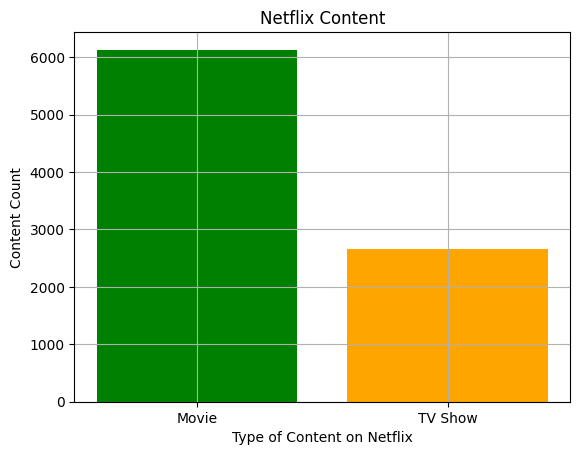

In [12]:
# how many movies and tv shows
count = df['type'].value_counts()
# count.plot(kind = 'bar',color = ['green','orange'])
plt.bar(count.index,count.values,color = ['green','orange']) # another way of doing this
plt.xlabel("Type of Content on Netflix")
plt.ylabel("Content Count")
plt.title('Netflix Content')
plt.grid(True)
plt.show()


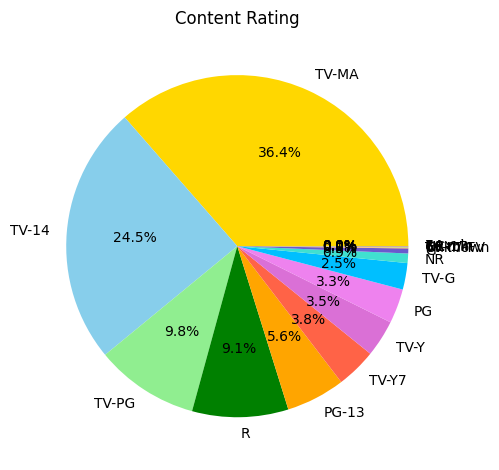

In [13]:
#percentage of each content rating
df['rating'].nunique()
count = df['rating'].value_counts()
plt.pie(count.values,labels = count.index,autopct = '%1.1f%%',colors = [
    'gold', 'skyblue', 'lightgreen', 'green', 'orange',
    'tomato', 'orchid', 'violet', 'deepskyblue', 'turquoise',
    'slateblue', 'coral', 'khaki', 'limegreen', 'plum',
    'peru', 'steelblue', 'crimson'
]
 )
plt.title("Content Rating")
plt.tight_layout()
plt.show()


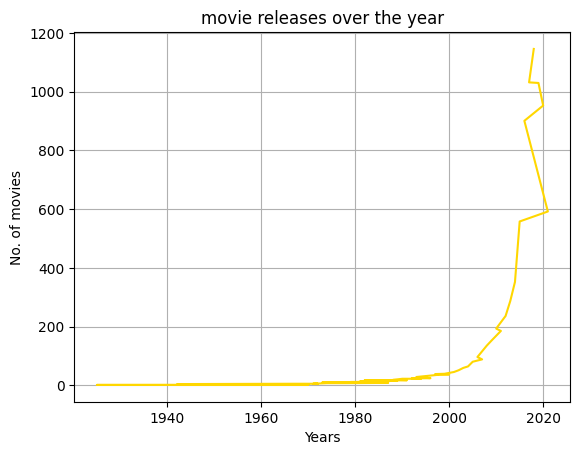

In [14]:
# How has the number of movies released changed over the years
df.columns
count = df['release_year'].value_counts()
plt.plot(count.index,count.values,color = 'gold')
plt.xlabel('Years')
plt.ylabel('No. of movies')
plt.grid(True)
plt.title('movie releases over the year')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\anujs\AppData\Local\Temp\ipykernel_4504\2568271587.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float).astype('Int64')


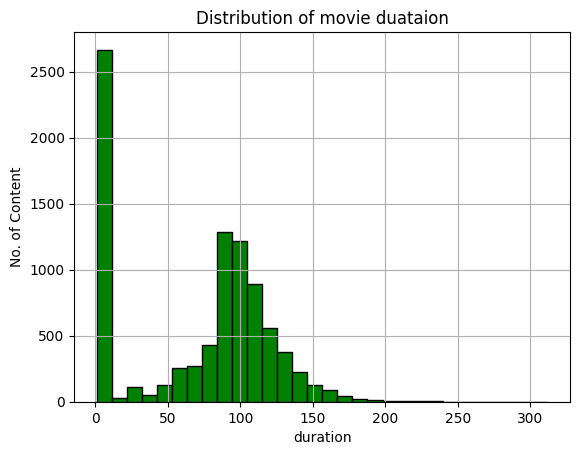

In [15]:
# what is distribution of movie duration
df.columns
df.nunique()
df['duration'].dtype
df.head(2)
# creating new column named duration_int to store numeric 
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float).astype('Int64')
plt.hist(df['duration_int'],30,color ='green',edgecolor = 'black')
plt.xlabel('duration')
plt.ylabel('No. of Content')
plt.title('Distribution of movie duataion')
plt.grid(True)
plt.show()

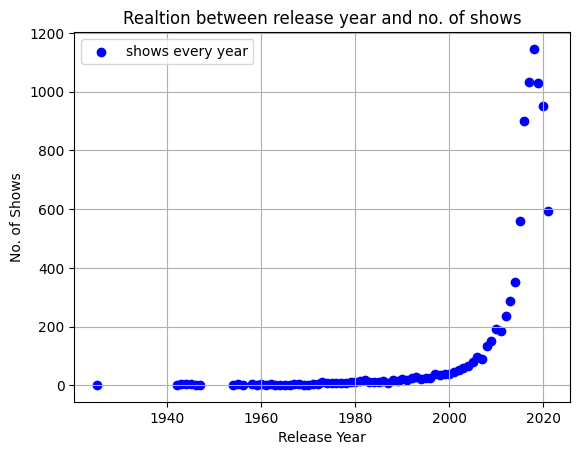

In [16]:
#Realtion between release year and no. of shows
df.columns
df['release_year'].nunique()
count = df['release_year'].value_counts()
plt.scatter(count.index,count.values,color='blue',marker='o',label = 'shows every year')
plt.xlabel('Release Year')
plt.ylabel('No. of Shows')
plt.title("Realtion between release year and no. of shows")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Top 10 countries with highest no. of shows
df.columns
#top 10 countries with highest no. of shows
count = df['country'].value_counts().sort_values(ascending=False).head(10)
plt.barh(count.index,count.values,color = 'orange',label = 'top 10 with Highest shows')   
plt.xlabel = 'No.of shows'
plt.ylabel = 'Country'
plt.title = 'Top 10 countries with highest no. of shows'
plt.grid(True)
plt.legend()
plt.show()

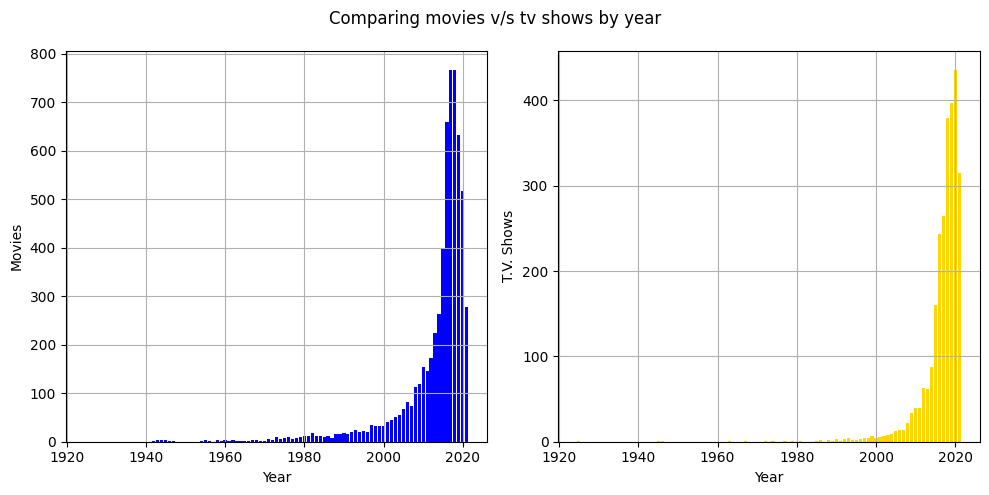

In [53]:
# Comparing Multiple plots together(Movies v/s tv shows by year)
df.columns
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize = (10,5))
x = content_by_year.index
y1 = content_by_year['Movie']
y2 = content_by_year['TV Show']

#Movies year wise
ax[0].bar(x,y1,color = 'blue')
ax[0].grid(True)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Movies')

#TV shows year wise
ax[1].bar(x,y2,color = 'gold')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('T.V. Shows')
ax[1].grid(True)
plt.suptitle("Comparing movies v/s tv shows by year")
plt.tight_layout()
plt.show()


In [18]:
# Top 10 Directors with Most Titles
# print(df.groupby('director')['title'].value_counts())
TopDirector = df[df['director'] !='Unknown']['director'].value_counts().head()
print(TopDirector)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Name: count, dtype: int64


In [ ]:
# Top 5 Most Common Genres
df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

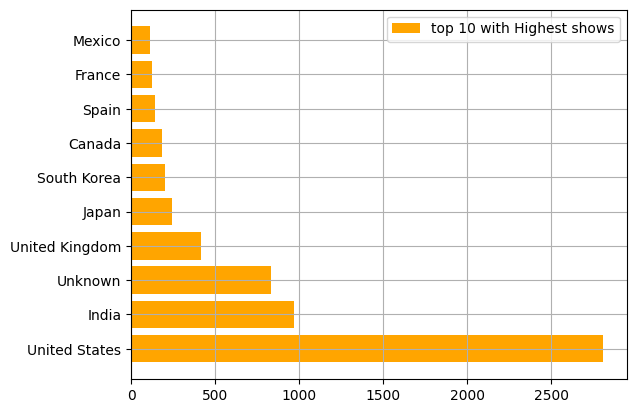

In [54]:
# Top 10 countries with highest no. of shows
df.columns
#top 10 countries with highest no. of shows
count = df['country'].value_counts().sort_values(ascending=False).head(10)
plt.barh(count.index,count.values,color = 'orange',label = 'top 10 with Highest shows')   
plt.xlabel = 'No.of shows'
plt.ylabel = 'Country'
plt.title = 'Top 10 countries with highest no. of shows'
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Number of Titles Added Each Year
df['Year_added'].value_counts()

Year_added
2019.0    1999
2020.0    1878
2018.0    1625
2021.0    1498
2017.0    1164
2016.0     418
2015.0      73
2014.0      23
2011.0      13
2013.0      10
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

In [22]:
# Longest Movies on Netflix
df[df['type'] == 'Movie'].sort_values('duration', ascending=False)[['title', 'duration']].head(10)

,title,duration
5794,Louis C.K.: Hilarious,Unknown
5541,Louis C.K. 2017,Unknown
5813,Louis C.K.: Live at the Comedy Store,Unknown
6415,Candyman,99 min
3411,Up North,99 min
5893,Winter on Fire: Ukraine's Fight for Freedom,99 min
7924,Salem: His Sister's Father,99 min
3431,The Bling Lagosians,99 min
7534,My Dog is My Guide,99 min
5502,In the Shadow of Iris,99 min


In [23]:
#Movies Released Before 2011
df[(df['type']=='Movie') & (df['Year_added']<2011)]['title']

5955                       Splatter
5956        Just Another Love Story
5957           To and From New York
7370    Mad Ron's Prevues from Hell
Name: title, dtype: object

In [24]:
# How Many Titles Have “Love” in the Title
df[df['title'].str.contains('love')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,duration_int
922,s923,Movie,The Clovehitch Killer,Duncan Skiles,"Dylan McDermott, Charlie Plummer, Samantha Mat...",United States,2021-05-04,2018,TV-MA,109 min,"Dramas, Independent Movies, Thrillers",A teenager's picture-perfect family is torn ap...,2021.0,5.0,109
1509,s1510,Movie,"Ariana grande: excuse me, i love you",Paul Dugdale,Ariana Grande,United States,2020-12-21,2020,TV-MA,98 min,"Documentaries, Music & Musicals",Ariana Grande takes the stage in London for he...,2020.0,12.0,98
2521,s2522,Movie,"I love you, stupid",Laura Mañá,"Quim Gutiérrez, Natalia Tena, Alfonso Bassave,...",Spain,2020-05-15,2019,TV-MA,88 min,"Comedies, International Movies, Romantic Movies","After Marcos is dumped by his girlfriend, he a...",2020.0,5.0,88
2857,s2858,TV Show,Calico Critters Mini Episodes Clover,Unknown,"Stephanie Sheh, Erika Harlacher, Julie Maddale...",Unknown,2020-03-01,2020,TV-Y,1 Season,Kids' TV,From throwing parties to planning fashion show...,2020.0,3.0,1
4833,s4834,Movie,Alex Strangelove,Craig Johnson,"Daniel Doheny, Madeline Weinstein, Antonio Mar...",United States,2018-06-08,2018,TV-MA,100 min,"Comedies, Dramas, Independent Movies",High school senior Alex Truelove's plan to los...,2018.0,6.0,100
5047,s5048,Movie,The Cloverfield Paradox,Julius Onah,"Gugu Mbatha-Raw, David Oyelowo, Daniel Brühl, ...",United States,2018-02-05,2018,PG-13,102 min,"Action & Adventure, Sci-Fi & Fantasy","Orbiting above a planet on the brink of war, s...",2018.0,2.0,102
5712,s5713,Movie,Donald Glover: Weirdo,"Shannon Hartman, Michelle Caputo",Donald Glover,United States,2016-11-19,2012,TV-MA,65 min,Stand-Up Comedy,Fearlessly funny stand-up comic and sitcom sta...,2016.0,11.0,65
6503,s6504,Movie,Cloverfield,Matt Reeves,"Lizzy Caplan, Jessica Lucas, T.J. Miller, Mich...",United States,2020-01-01,2008,PG-13,85 min,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",A going-away party in Manhattan is interrupted...,2020.0,1.0,85


# Grouping Data

In [25]:
# Count of Movies and TV Shows
print(df.groupby('type')['type'].count())
# Number of Titles Added per Year
df.groupby('Year_added')['Year_added'].count()
# Top 10 Directors with Most Titles
df[df['director'] != 'Unknown'].groupby('director')['title'].count().sort_values(ascending=False)
#. Average Movie Duration by Country
df[df['type']=='Movie'].groupby('country')['duration_int'].mean().head(10)
df.columns

type
Movie      6131
TV Show    2666
Name: type, dtype: int64


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Year_added', 'Month_added', 'duration_int'],
      dtype='object')

# Feature Engineering

In [26]:
df['content_age'] = 2025 - df['release_year']
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

# Correlation Analysis

In [27]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

              release_year  Year_added  Month_added  duration_int  content_age
release_year      1.000000    0.110473    -0.039316     -0.249925    -1.000000
Year_added        0.110473    1.000000    -0.160555      0.016436    -0.110473
Month_added      -0.039316   -0.160555     1.000000     -0.016876     0.039316
duration_int     -0.249925    0.016436    -0.016876      1.000000     0.249925
content_age      -1.000000   -0.110473     0.039316      0.249925     1.000000


In [28]:
# df.to_csv('CleanedNetflixDataset.csv',index=False)
df.to_excel('CleanedNetflixDataset.xlsx',index = False)